# Supervised Learning Project: Finding Donors for *CharityML* (Reproduction)

<font color='red'>**Note:**</font> This notebook is a reproduction of the original project notebook. The original notebook can be found [here](https://github.com/sajal2692/data-science-portfolio/blob/master/finding_donors/finding_donors.ipynb)

<a href="#1">1-) Loading the necessary libraries</a> <br>
<a href="#2">2-) Data Exploration</a><br>
<a href="#3">3-) Data Preparation</a><br>
<a href="#4">4-) Data Preprocessing</a><br>
<a href="#5">5-) Shuffle and Split Data</a><br>
<a href="#6">6-) Evaluating Model Performance</a><br>
<a href="#7">7-) Model Tuning</a><br>
<a href="#8">8-) Feature Importance</a><br>
<a href="#9">9-) Feature Selection</a><br>
<a href="#10">10-) References</a><br>

<h5 id="1">Loading the necessary libraries</h5>


In [3]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import visualisation libraries
import visuals as vs
import seaborn as sns
import matplotlib.pyplot as plt

# Pretty display for notebooks
%matplotlib inline

#for version stability
#from __future__ import division

# Load the Census dataset
data = pd.read_csv("census.csv")

# Success - Display the first three record
display(data.head(n=3))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K


<h5 id="2">Data Exploration</h5>

<b>Listing of attributes:</b> (Bold descriptions are taken from the reference<sup>1</sup>.)
<small>

* *age*: <strong>the age of an individual
 Integer greater than 0</strong>
 
continuous
<hr/>

* *workclass*: <strong>a general term to represent the employment status of an individual</strong>

 Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
<hr/>

* *fnlwgt*: <strong>final weight. In other words, this is the number of people the census believes
the entry represents</strong>

continuous. (deleted by the author)
<hr/>

* *education*: <strong>the highest level of education achieved by an individual.</strong>

Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, 
Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
<hr/>

* *education-num*: <strong>the highest level of education achieved in numerical form.</strong>

 continuous.
 <hr/>

* *marital-status*: <strong>marital status of an individual. Married­civ­spouse corresponds to a
civilian spouse while Married­AF­spouse is a spouse in the Armed Forces.</strong>

 Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
 <hr/>

* *occupation*:  <strong>the general type of occupation of an individual.</strong>


 Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
 <hr/>

* *relationship*: <strong>represents what this individual is relative to others.</strong>

 Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
 <hr/>

* *race*: <strong>descriptions of an individual’s race.</strong>

 White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
 <hr/>

* *sex*: <strong>the biological sex of the individual.</strong>

 Female, Male.
 <hr/>

* *capital-gain*: <strong>capital gains for an individual.</strong>

 continuous.
 <hr/>

* *capital-loss*: <strong>capital loss for an individual.</strong>

 continuous.
 <hr/>

* *hours-per-week*: <strong>the hours an individual has reported to work per week.</strong>

 continuous.
 <hr/>

* *native-country*: <strong>country of origin for an individual.</strong>

 United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
<hr/>

* *income*: <strong>whether an individual makes more than $50,000 annually.</strong>

 <=50K, >50K.

</small>

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              45222 non-null  int64  
 1   workclass        45222 non-null  object 
 2   education_level  45222 non-null  object 
 3   education-num    45222 non-null  float64
 4   marital-status   45222 non-null  object 
 5   occupation       45222 non-null  object 
 6   relationship     45222 non-null  object 
 7   race             45222 non-null  object 
 8   sex              45222 non-null  object 
 9   capital-gain     45222 non-null  float64
 10  capital-loss     45222 non-null  float64
 11  hours-per-week   45222 non-null  float64
 12  native-country   45222 non-null  object 
 13  income           45222 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 4.8+ MB


In [5]:
# Total number of records
n_records = len(data)

# Number of records where individual's income is more than $50,000
n_greater_50k = len(data[data['income'] == '>50K'])

# Number of records where individual's income is at most $50,000
n_at_most_50k = len(data[data['income'] == '<=50K'])

# Percentage of individuals whose income is more than $50,000
greater_percent = 100 * n_greater_50k / n_records

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {:.2f}%".format(greater_percent))

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78%


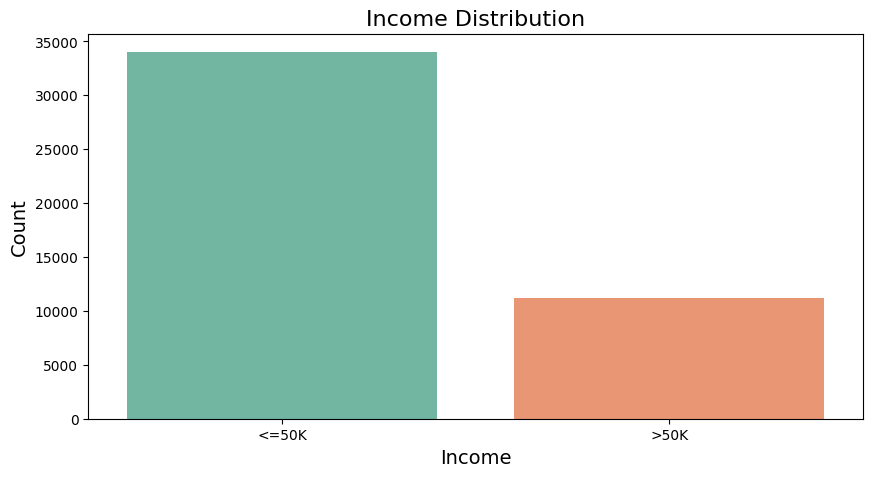

The number of people with income less than or equal to 50K is higher than the number of people with income more than 50K.


In [6]:

# Başak's Addition
#Visualize n_greater_50k and n_at_most_50k with barplot
plt.figure(figsize=(10,5))
sns.barplot(x=['<=50K', '>50K'], y=[n_at_most_50k, n_greater_50k], palette='Set2')
plt.title('Income Distribution', fontsize=16)
plt.xlabel('Income', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.savefig('visuals/income_distribution.png') 
plt.show()   
if n_greater_50k > n_at_most_50k:
    print("The number of people with income more than 50K is higher than the number of people with income less than or equal to 50K.")
else:
    print("The number of people with income less than or equal to 50K is higher than the number of people with income more than 50K.")
    



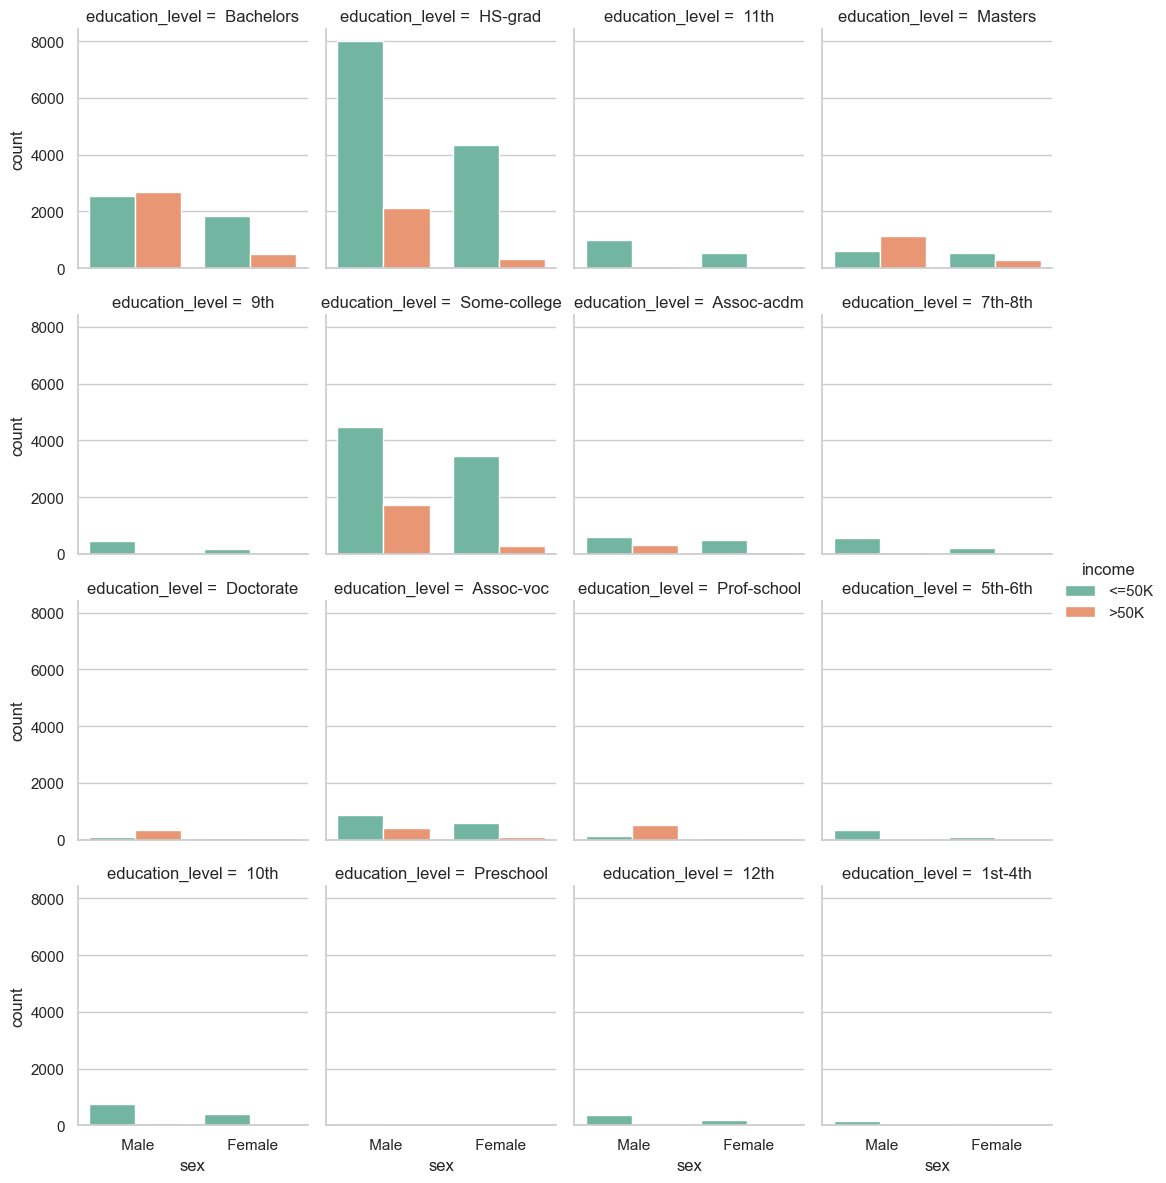

In [7]:
#Başak's - Small changes

sns.set(style="whitegrid", color_codes=True)
sns.catplot(x="sex", col='education_level', data=data, hue='income', kind="count", col_wrap=4
            , height=3, aspect=.9, palette='Set2')
plt.savefig('visuals/education_level.png')
plt.show()


<h6> Categorical Column Analysis </h6>

In [8]:
#Başak's addition
all_columns = list(data.columns)
print('all_columns:\n {}'.format(all_columns))

categorical_columns = list(data.select_dtypes(include=['object']).columns)
print('Categorical columns:\n {}'.format(categorical_columns))

numerical_columns = list(data.select_dtypes(include=['int64', 'float64']).columns)
print('Numerical columns:\n {}'.format(numerical_columns))




all_columns:
 ['age', 'workclass', 'education_level', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
Categorical columns:
 ['workclass', 'education_level', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']
Numerical columns:
 ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


In [9]:
#Başak's addition
len(categorical_columns)

9

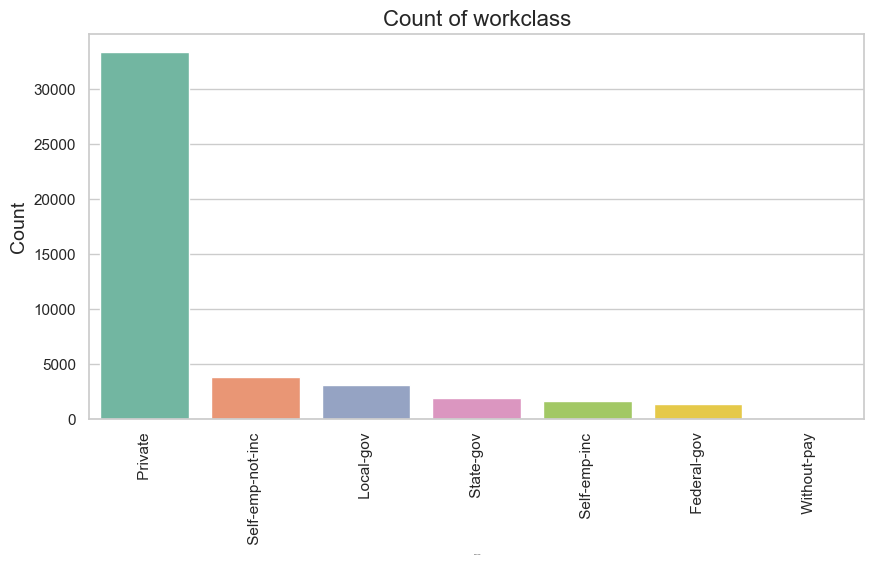

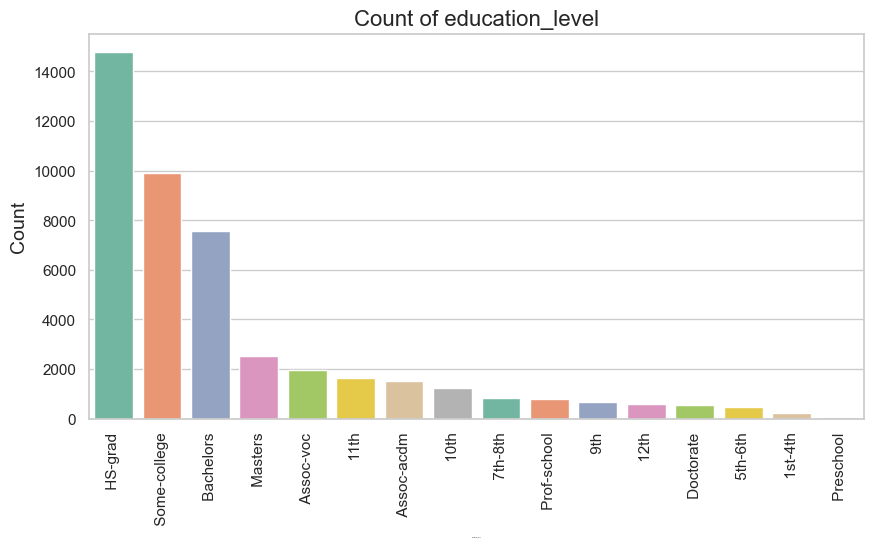

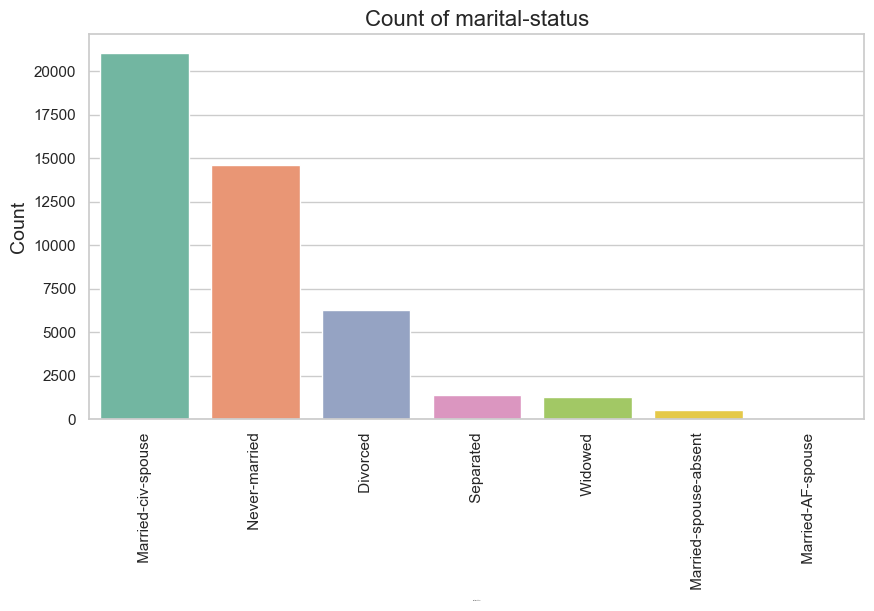

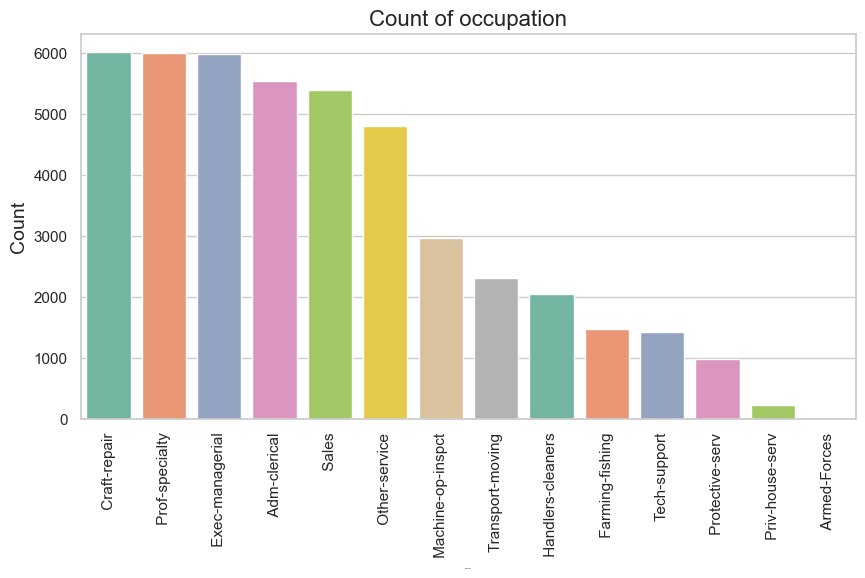

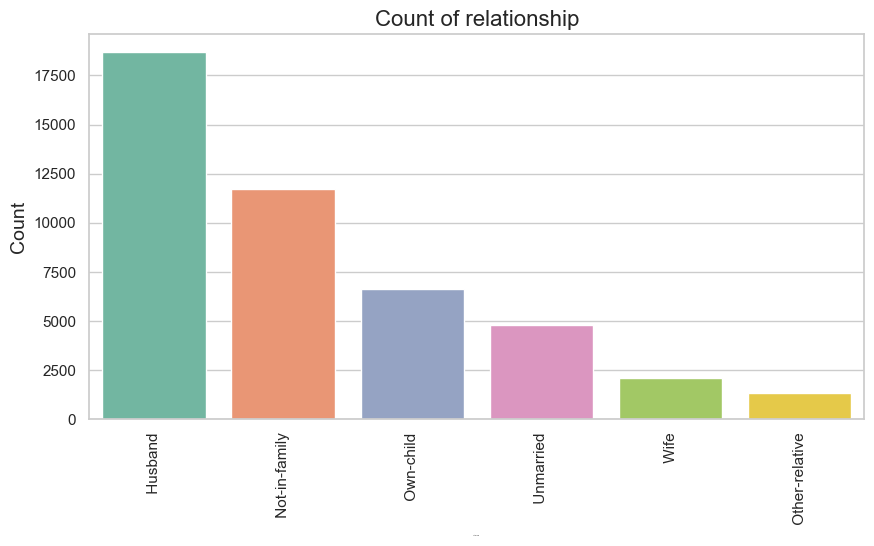

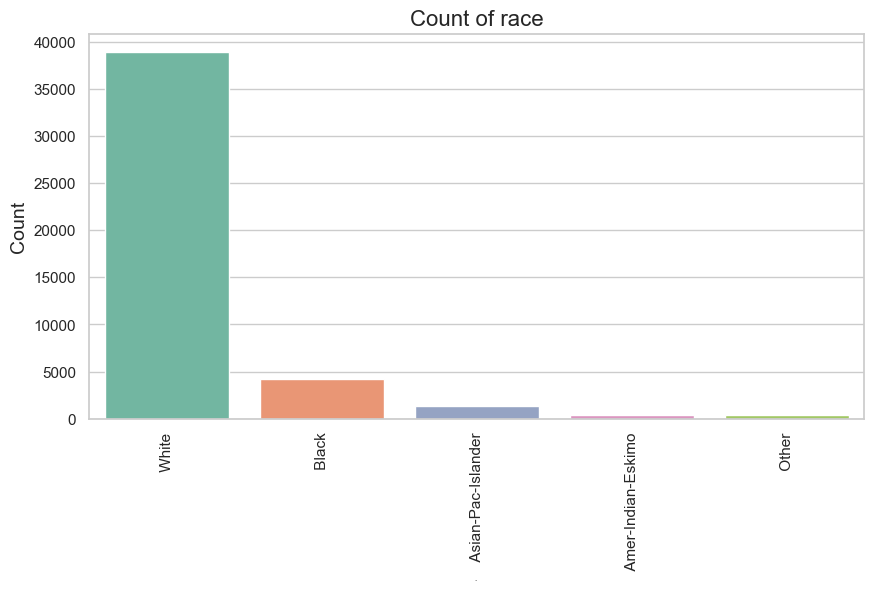

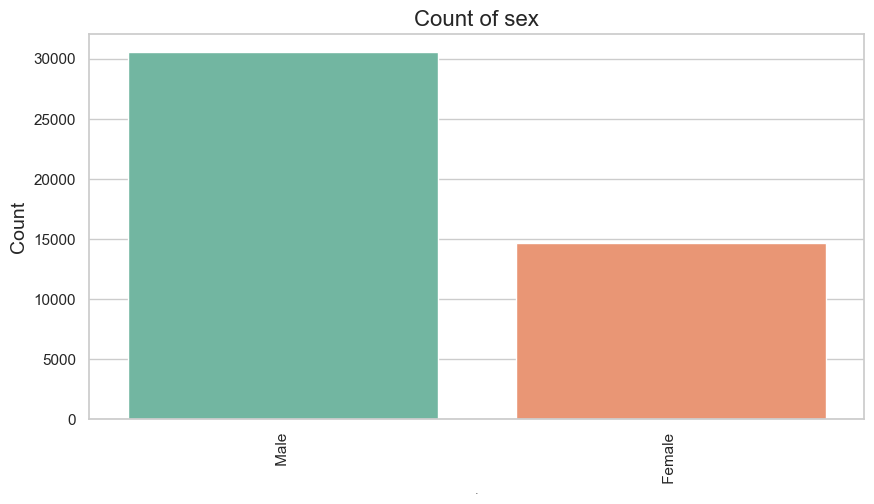

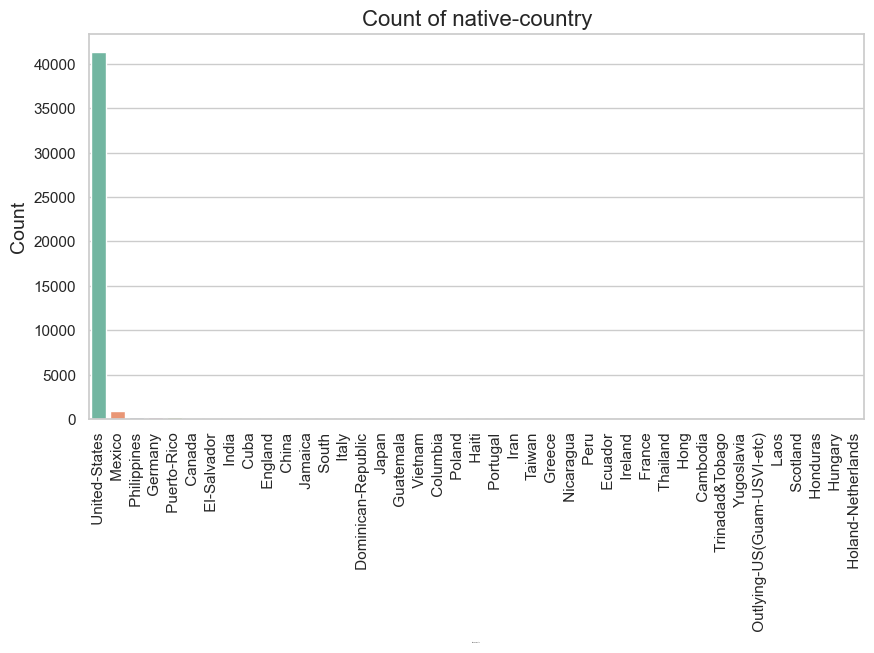

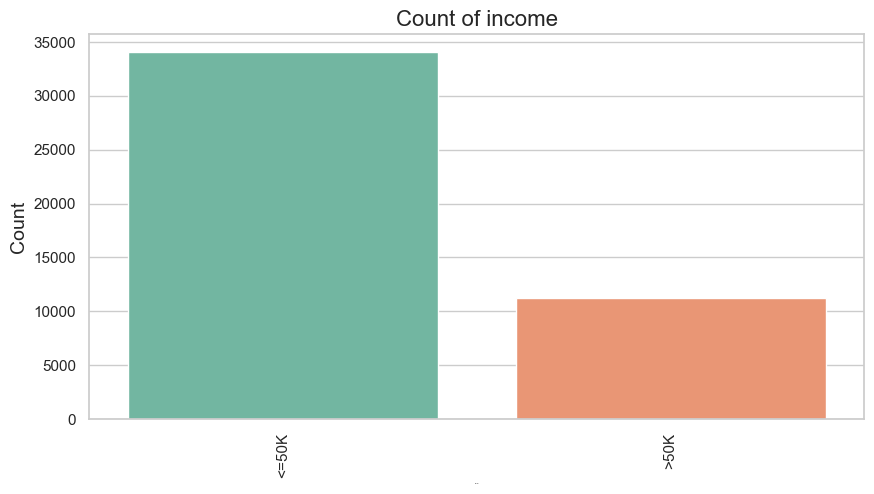

In [25]:
#Başak's addition
#ordered categorical columns
for i in range(len(categorical_columns)):
    plt.figure(figsize=(10,5))
    sns.countplot(x=categorical_columns[i], data=data, palette='Set2', order=data[categorical_columns[i]].value_counts().index)
    plt.title('Count of {}'.format(categorical_columns[i]), fontsize=16)
    plt.xlabel(categorical_columns[i], fontsize=1)
    #xlabel rotation
    plt.xticks(rotation=90)
    plt.ylabel('Count', fontsize=14)
    plt.savefig('visuals/count{}.png'.format(categorical_columns[i]))
    plt.show()

In [11]:
#Başak's addition
#set space between the rows
for i in data.groupby(['workclass', 'income']).size().index:
    print(i , data.groupby(['workclass', 'income']).size()[i])
    print("-----------------------")
#data.groupby(['workclass', 'income']).size()

(' Federal-gov', '<=50K') 857
-----------------------
(' Federal-gov', '>50K') 549
-----------------------
(' Local-gov', '<=50K') 2185
-----------------------
(' Local-gov', '>50K') 915
-----------------------
(' Private', '<=50K') 26056
-----------------------
(' Private', '>50K') 7251
-----------------------
(' Self-emp-inc', '<=50K') 734
-----------------------
(' Self-emp-inc', '>50K') 912
-----------------------
(' Self-emp-not-inc', '<=50K') 2737
-----------------------
(' Self-emp-not-inc', '>50K') 1059
-----------------------
(' State-gov', '<=50K') 1426
-----------------------
(' State-gov', '>50K') 520
-----------------------
(' Without-pay', '<=50K') 19
-----------------------
(' Without-pay', '>50K') 2
-----------------------


In [12]:
#Başak's addition
for column in categorical_columns:
    print(column)
    print("-----------------------")
    for i in data.groupby([column, 'income']).size().index:
        print(i , data.groupby([column, 'income']).size()[i])
        print("                              ")
        

workclass
-----------------------
(' Federal-gov', '<=50K') 857
                              
(' Federal-gov', '>50K') 549
                              
(' Local-gov', '<=50K') 2185
                              
(' Local-gov', '>50K') 915
                              
(' Private', '<=50K') 26056
                              
(' Private', '>50K') 7251
                              
(' Self-emp-inc', '<=50K') 734
                              
(' Self-emp-inc', '>50K') 912
                              
(' Self-emp-not-inc', '<=50K') 2737
                              
(' Self-emp-not-inc', '>50K') 1059
                              
(' State-gov', '<=50K') 1426
                              
(' State-gov', '>50K') 520
                              
(' Without-pay', '<=50K') 19
                              
(' Without-pay', '>50K') 2
                              
education_level
-----------------------
(' 10th', '<=50K') 1141
                              
(' 10th', '>50K') 82
   

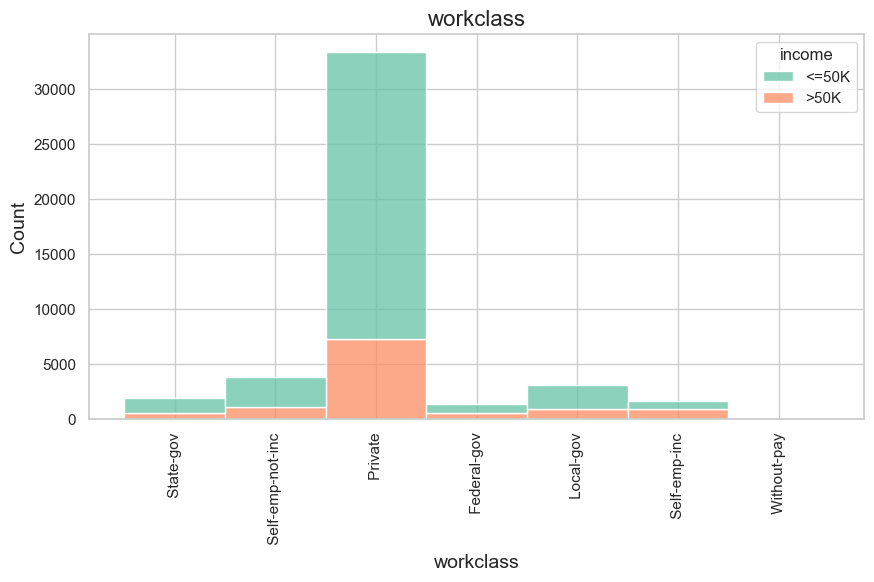

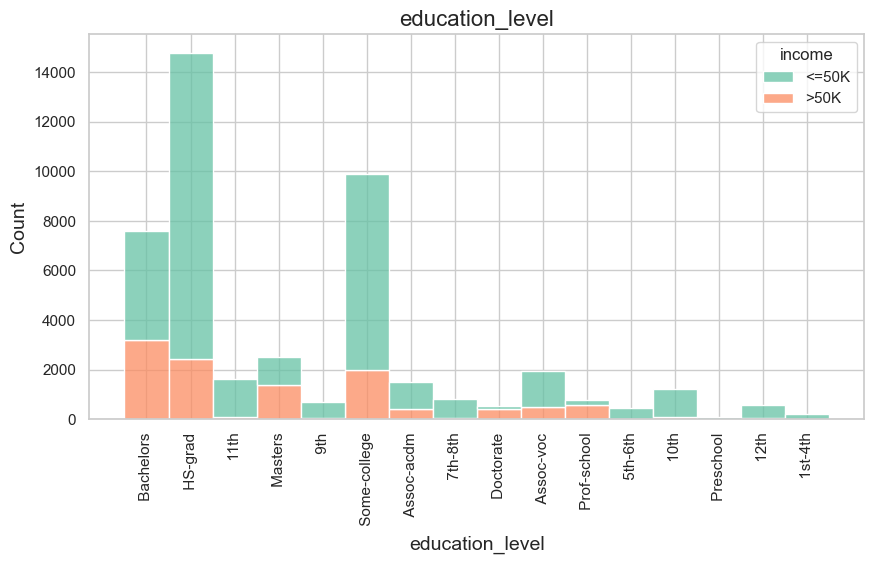

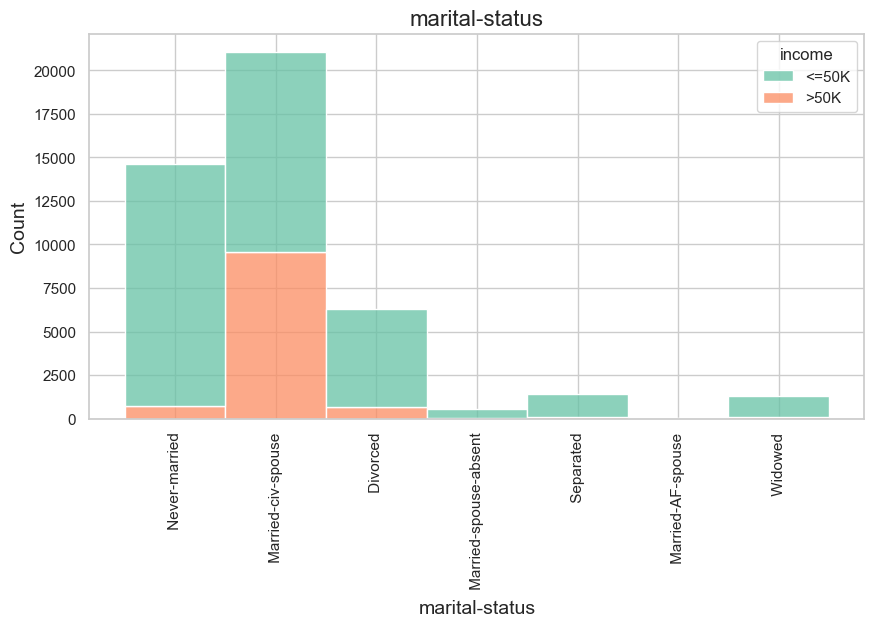

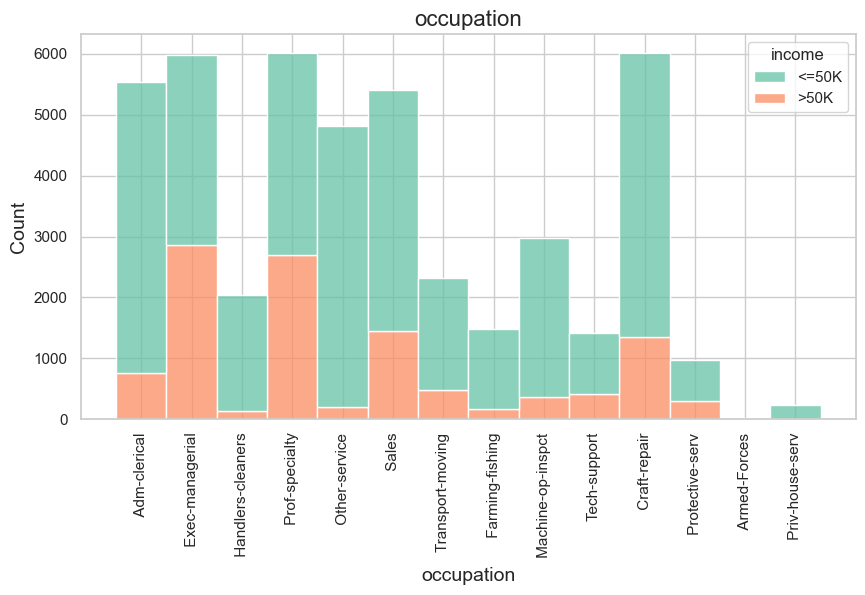

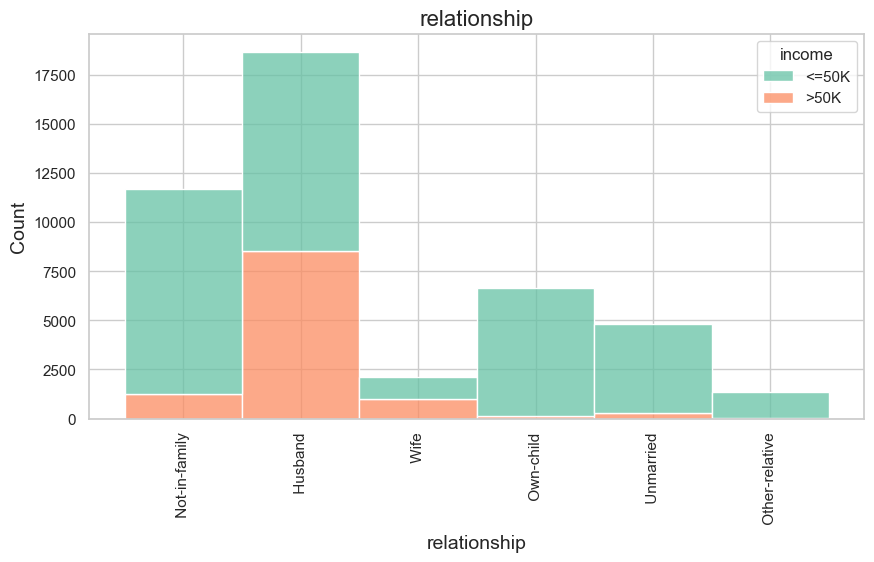

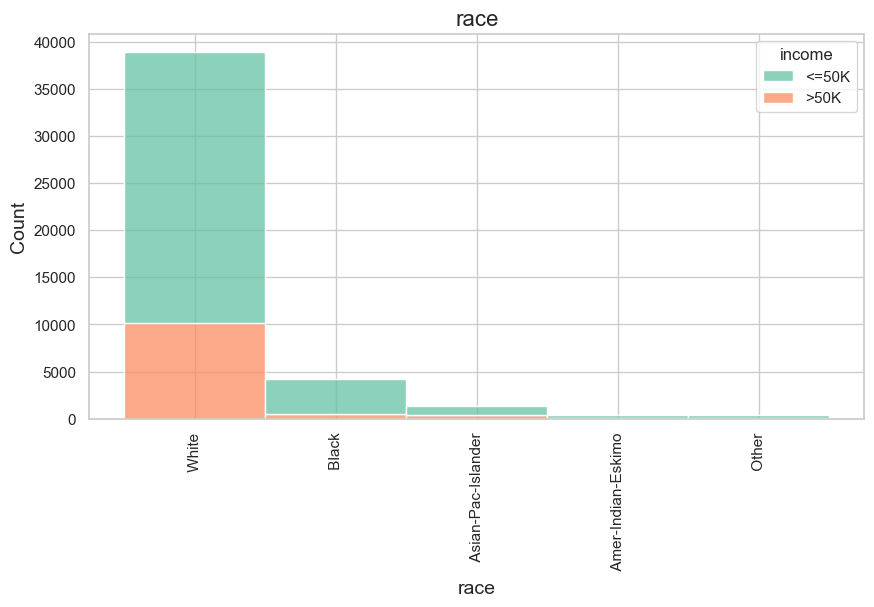

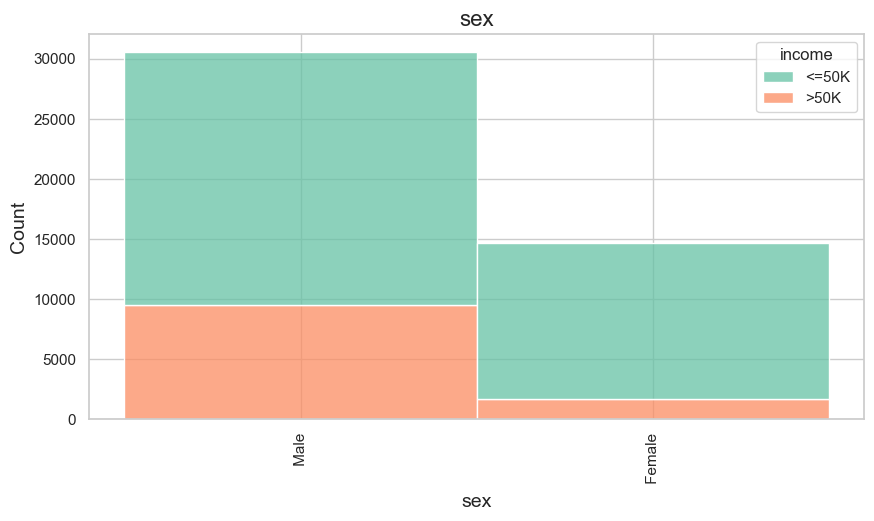

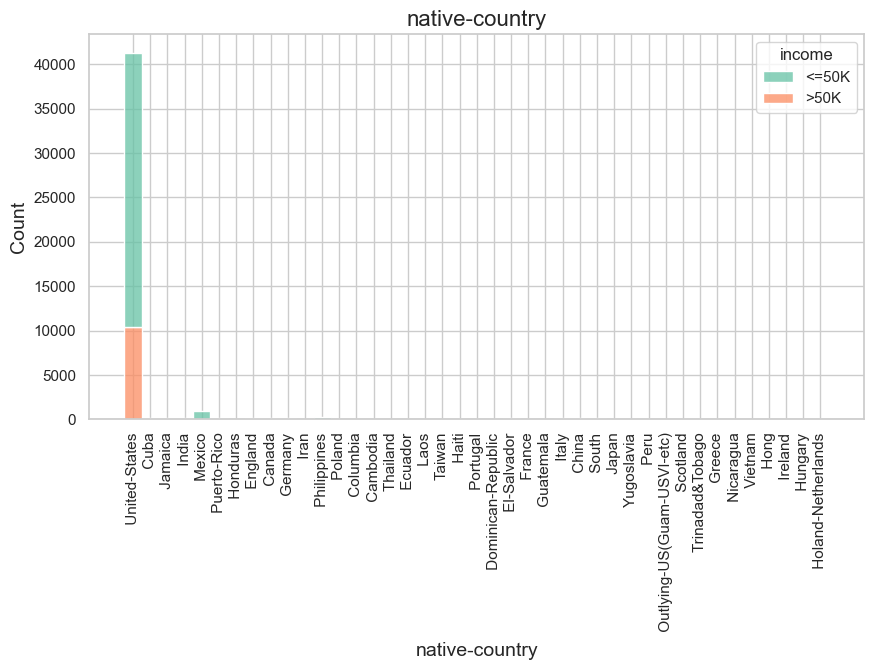

In [18]:
#Addition: I think it would be better to use histogram for categorical columns

for column in categorical_columns:
    if column == 'income':
        continue
    plt.figure(figsize=(10,5))
    sns.histplot(data=data, x=column, hue='income', multiple='stack', palette='Set2')
    plt.title(column, fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.xticks(rotation=90)
    plt.ylabel('Count', fontsize=14)
    plt.savefig('visuals/cp{}.png'.format(column))
    plt.show()
    

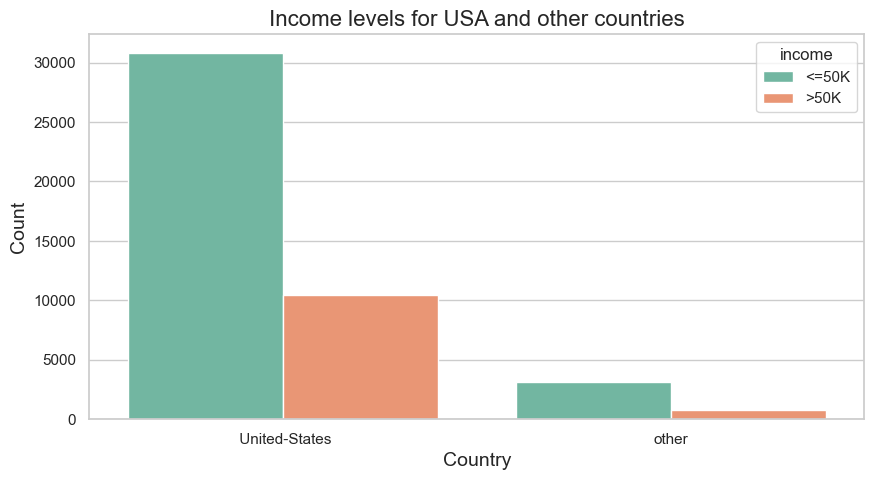

In [ ]:
#Başak's addition   
#plot income levels for each country
#some countries have very few people, so we can't see the difference between income levels
#solution: group countries with very few people into one group
#group countries with less than 1000 people into one group
data['native-country'].value_counts()

for i in data['native-country'].value_counts().index:
    if data['native-country'].value_counts()[i] < 1000:
        data['native-country'].replace(i, 'other', inplace=True)
        
data['native-country'].value_counts()

#plot income levels for USA and other countries
plt.figure(figsize=(10,5))
sns.countplot(x='native-country', hue='income', data=data, palette='Set2')
plt.title('Income levels for USA and other countries', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.savefig('visuals/income_levels_for_USA_and_other_countries.png')
plt.show()
    

<h6> Numerical Column Analysis </h6>

<Figure size 1000x500 with 0 Axes>

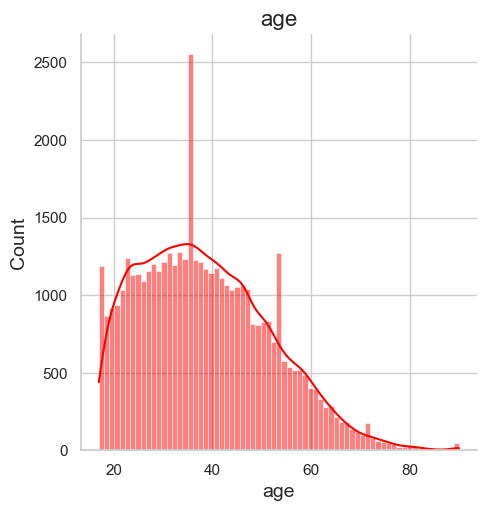

<Figure size 1000x500 with 0 Axes>

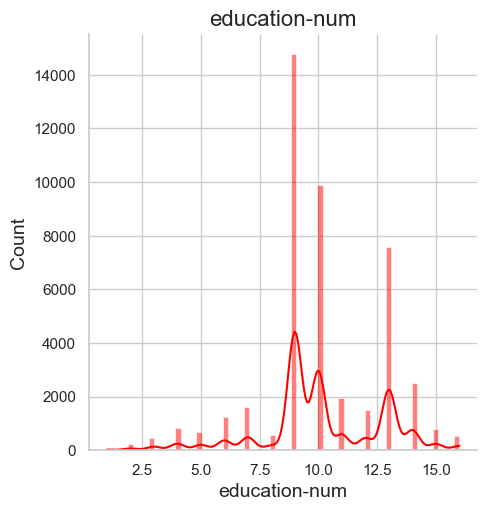

<Figure size 1000x500 with 0 Axes>

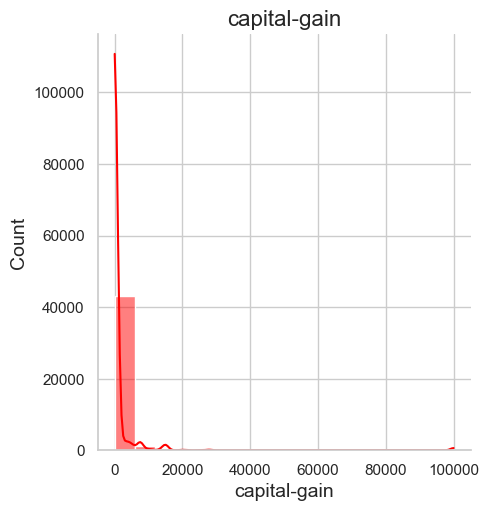

<Figure size 1000x500 with 0 Axes>

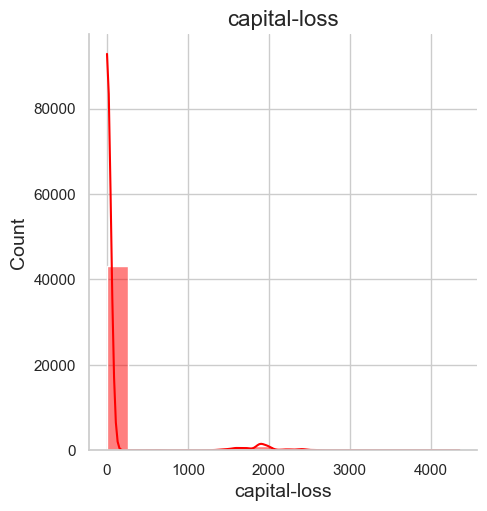

<Figure size 1000x500 with 0 Axes>

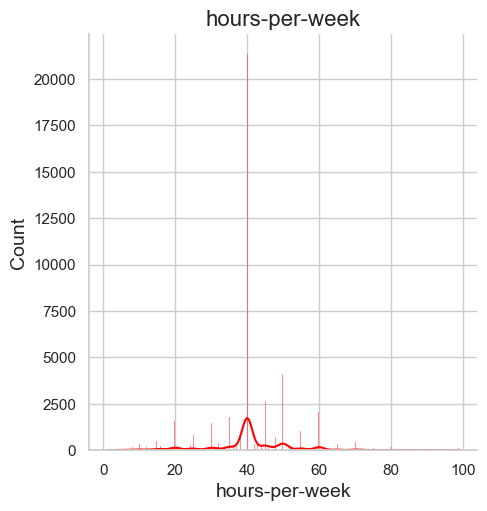

In [12]:
#Başak's addition
#set space between the rows
for column in numerical_columns:
    plt.figure(figsize=(10,5))
    sns.displot(data[column], kde=True, color='red')
    plt.title(column, fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.savefig('visuals/{}.png'.format(column))
    plt.show()
        

<h5 id="3">Data Preparation</h5>

d:\finding_donors\visuals.py:48: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


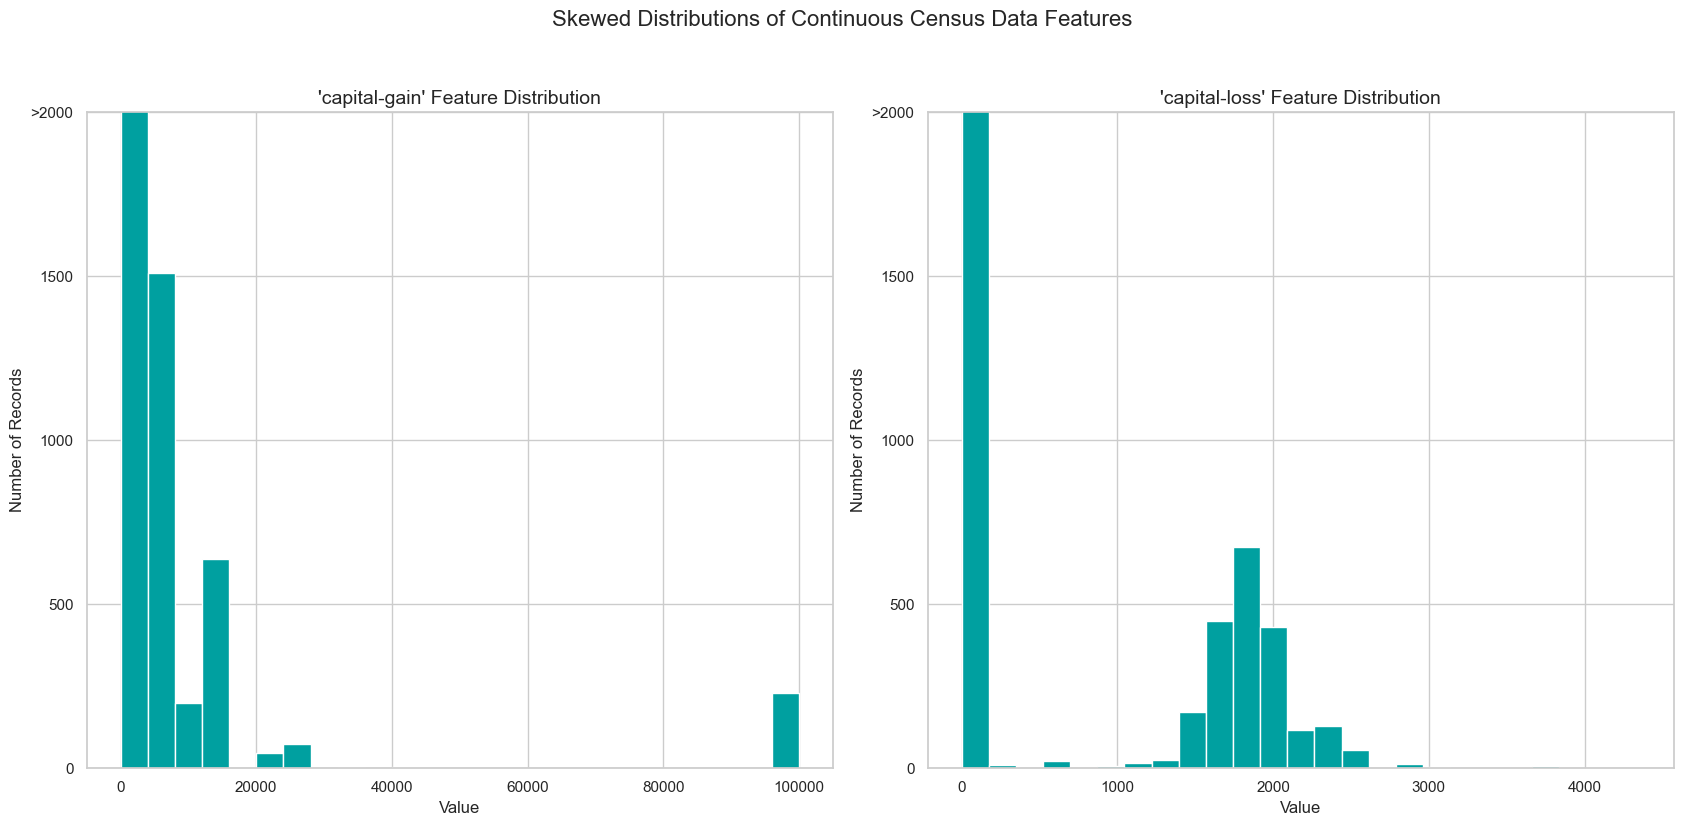

In [13]:
# Split the data into features and target label (exclude income)
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)
#save the plot
plt.savefig('visuals/capital-distribution.png')

* *Başak's Addition*:
Why log-transform the skewed features?

d:\finding_donors\visuals.py:48: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


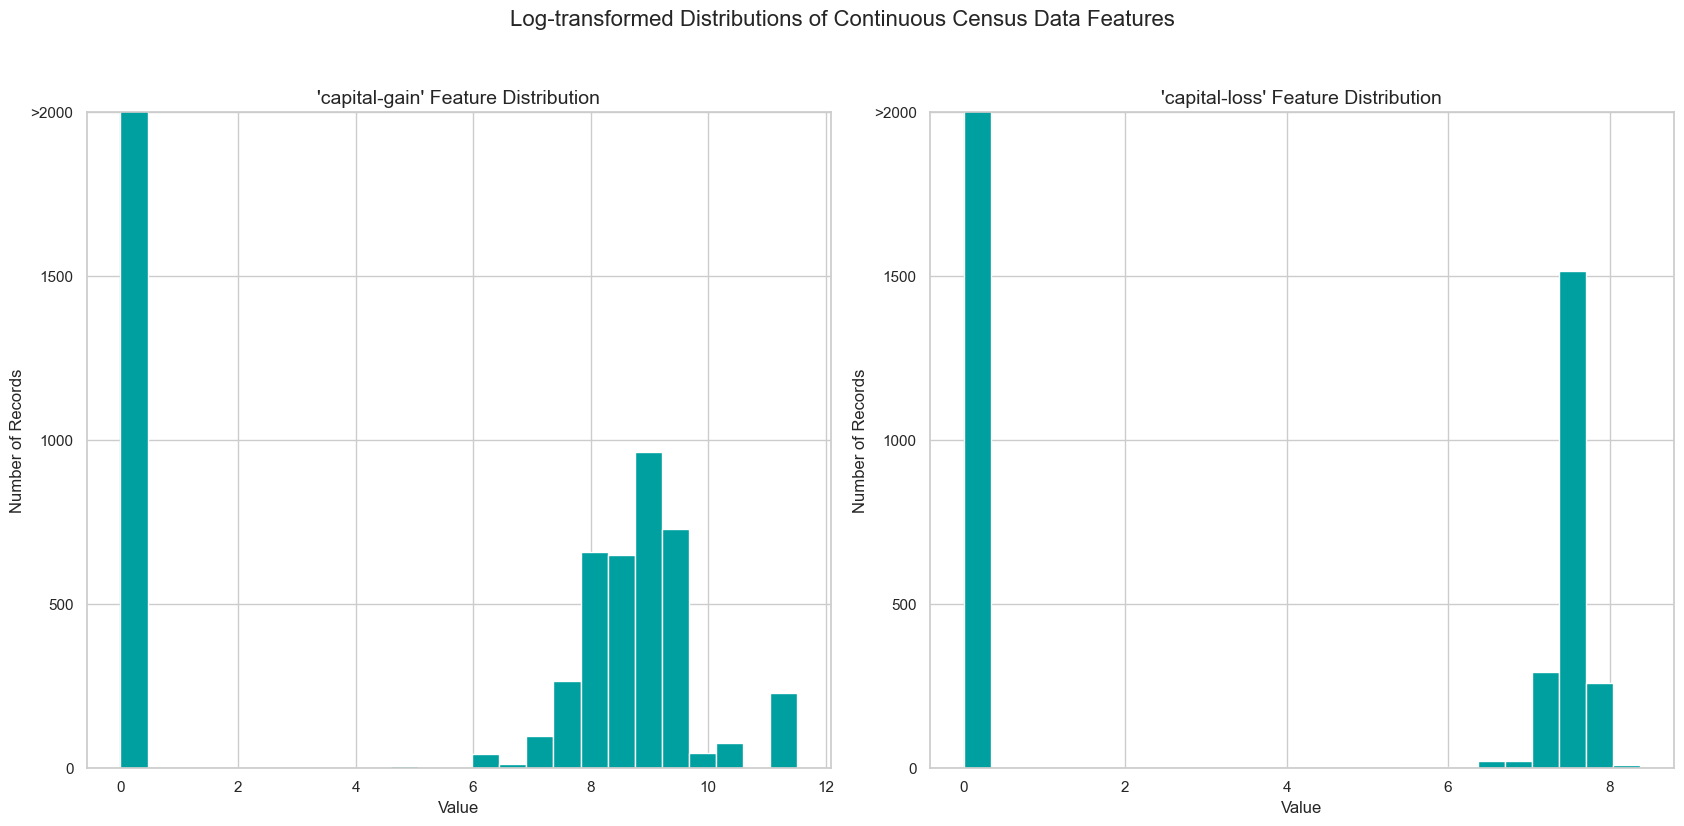

In [14]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_raw[skewed] = data[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_raw, transformed = True)
#save the plot
plt.savefig('visuals/capital-distribution-log.png')

<h6>Normalizing Numerical Features</h6>

In [15]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler()
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
features_raw[numerical] = scaler.fit_transform(data[numerical])

# Show an example of a record with scaling applied
display(features_raw.head(n = 1))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.30137,State-gov,Bachelors,0.8,Never-married,Adm-clerical,Not-in-family,White,Male,0.02174,0.0,0.397959,United-States


<h5 id="4">Data Preprocessing</h5>

In [16]:
#Başak's addition
#check for null values
features_raw.isnull().sum()
    

age                0
workclass          0
education_level    0
education-num      0
marital-status     0
occupation         0
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
dtype: int64

In [17]:
# One-hot encode the 'features_raw' data using pandas.get_dummies()
features = pd.get_dummies(features_raw)

# Encode the 'income_raw' data to numerical values
income = income_raw.apply(lambda x: 1 if x == '>50K' else 0)

# Print the number of features after one-hot encoding
encoded = list(features.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names 
# print encoded
# Left uncommented due to output size

64 total features after one-hot encoding.


<h6> Outlier Detection </h6>
    

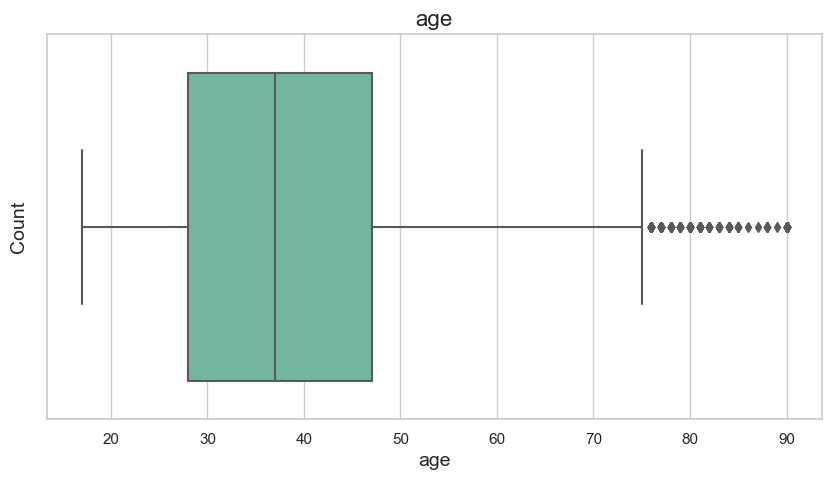

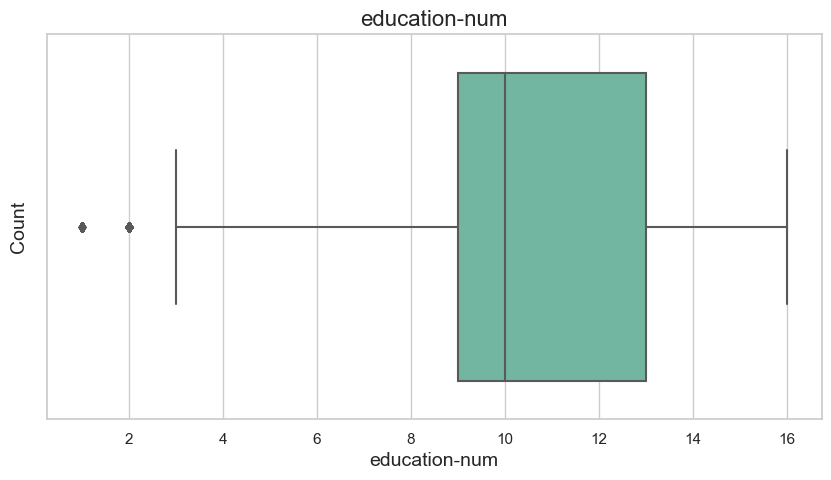

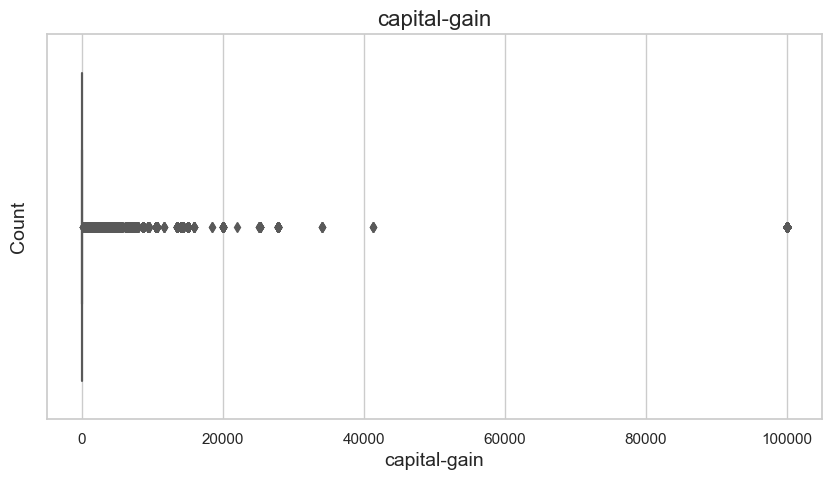

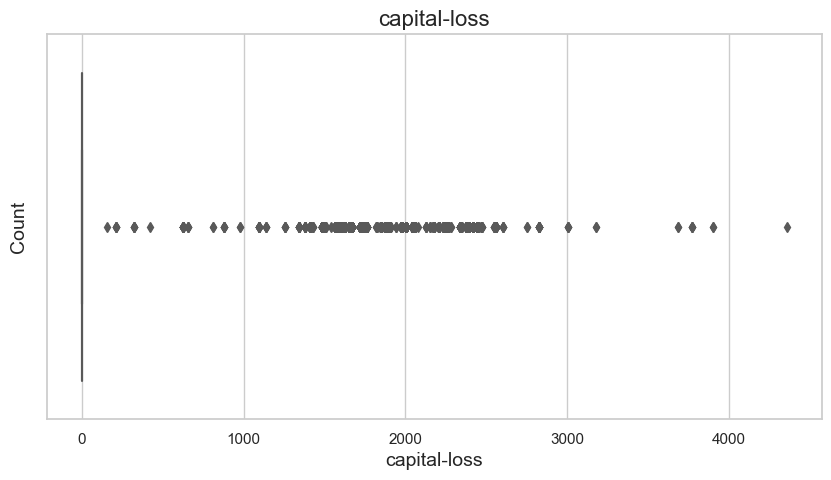

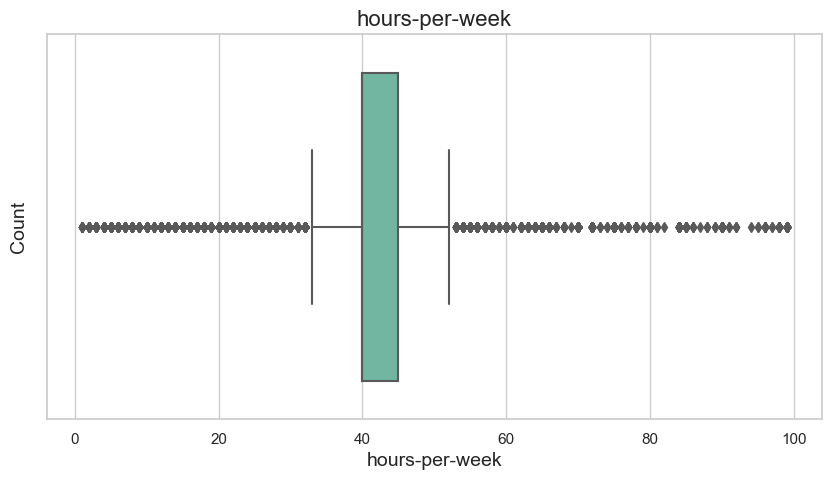

In [18]:
for i in range(len(numerical_columns)):
    plt.figure(figsize=(10,5))
    sns.boxplot(x=numerical_columns[i], data=data, palette='Set2')
    plt.title(numerical_columns[i], fontsize=16)
    plt.xlabel(numerical_columns[i], fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.savefig('visuals/{}.png'.format(numerical_columns[i]))
    plt.show()

<h6>Correlation Analysis</h6>

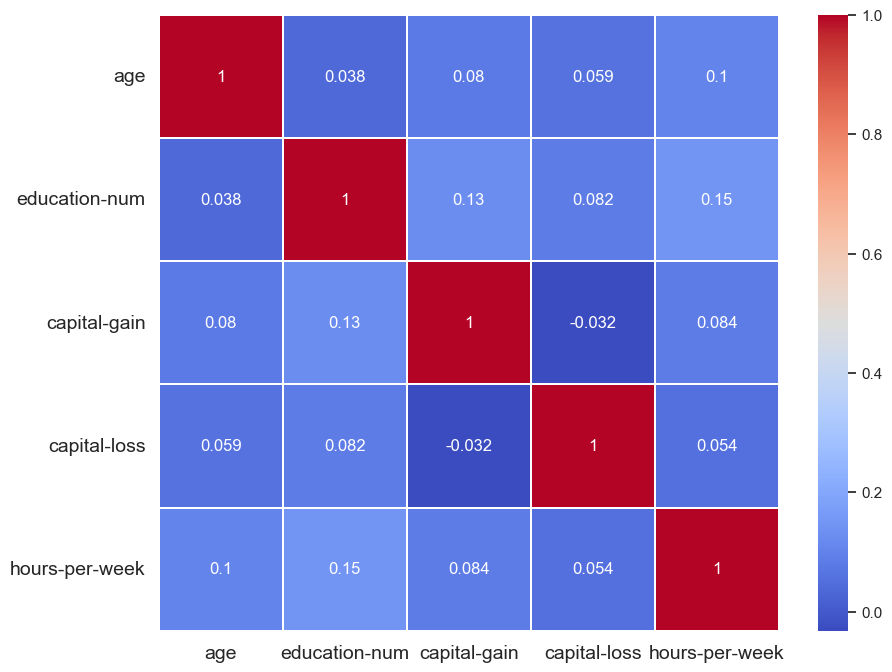

In [19]:
#Başak's addition
#correration matrix for numarical columns
corr = data[numerical_columns].corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.2)  
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('visuals/corr.png')
plt.show()
    

<h5 id="5">Shuffle and Split Data</h5>

In [20]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, income, test_size = 0.2, random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print(" ")
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
 
Testing set has 9045 samples.


<h5 id="6">Evaluating Model Performance<h/5>

<small> *Başak's Addition*:
What is Naive Predictor?<small/>

<h6>Naive Predictor Performance<h/6>

In [21]:
# Calculate accuracy
accuracy = n_greater_50k / n_records

# Calculating precision
precision = n_greater_50k / (n_greater_50k + n_at_most_50k)

#Calculating recall
recall = n_greater_50k / (n_greater_50k + 0)

# Calculate F-score using the formula above for beta = 0.5
fscore =  (1  + (0.5*0.5)) * ( precision * recall / (( 0.5*0.5 * (precision))+ recall))

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


<h5>Supervised Learning Models<h/5>

<h6>Creating a Training and Predicting Pipeline<h/6>

In [22]:
# Import two metrics from sklearn - fbeta_score and accuracy_score

from sklearn.metrics import fbeta_score, accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # Fit the learner to the training data using slicing with 'sample_size'
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size],y_train[:sample_size])
    end = time() # Get end time
    
    # Calculate the training time
    results['train_time'] = end - start
        
    # Get the predictions on the test set,
    #       then get predictions on the first 300 training samples
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end - start
            
    # Compute accuracy on the first 300 training samples
    results['acc_train'] = accuracy_score(y_train[:300],predictions_train)
        
    # Compute accuracy on test set
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    
    # Compute F-score on the the first 300 training samples
    results['f_train'] = fbeta_score(y_train[:300],predictions_train,beta=0.5)
        
    # Compute F-score on the test set
    results['f_test'] = fbeta_score(y_test,predictions_test,beta=0.5)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

<h6>Model Evaluation<h/6>

DecisionTreeClassifier trained on 362 samples.
DecisionTreeClassifier trained on 3618 samples.
DecisionTreeClassifier trained on 36177 samples.
SVC trained on 362 samples.
SVC trained on 3618 samples.
SVC trained on 36177 samples.
AdaBoostClassifier trained on 362 samples.
AdaBoostClassifier trained on 3618 samples.
AdaBoostClassifier trained on 36177 samples.


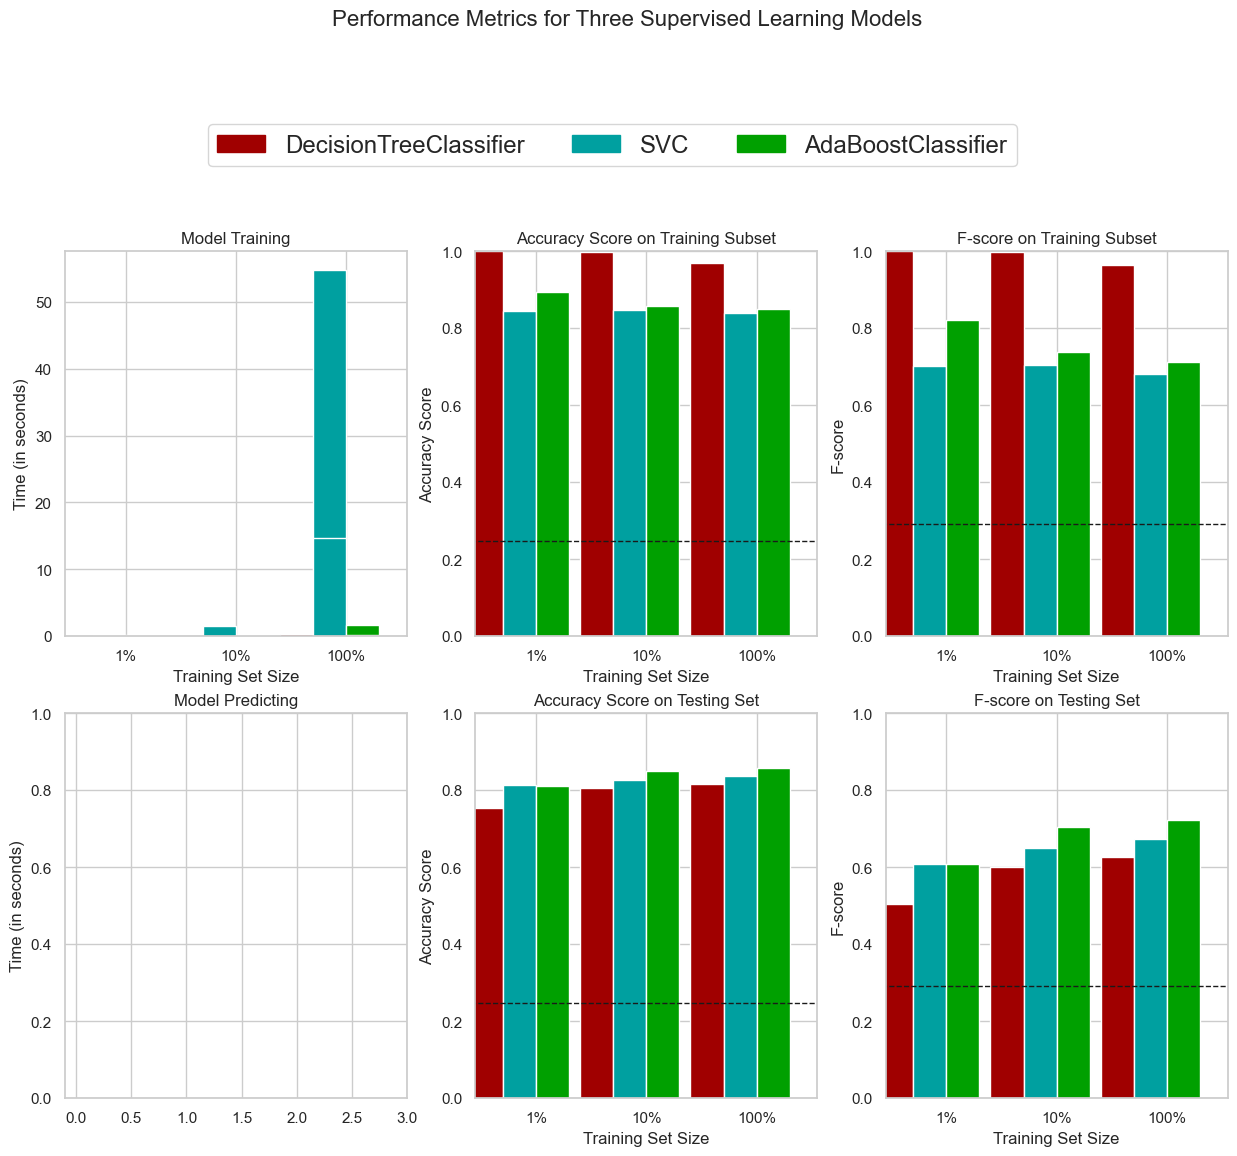

<Figure size 640x480 with 0 Axes>

In [23]:
#disable loc and iloc warnings
import warnings
warnings.filterwarnings("ignore")
    
# Import the three supervised learning models from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

# Initialize the three models, the random states are set to 101 so we know how to reproduce the model later
clf_A = DecisionTreeClassifier(random_state=101)
clf_B = SVC(random_state = 101)
clf_C = AdaBoostClassifier(random_state = 101)

# Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_1 = int(round(len(X_train) / 100))
samples_10 = int(round(len(X_train) / 10))
samples_100 = len(X_train)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)
plt.savefig('visuals/evaluation.png')


*Başak's Addition* <br> 
What is F-beta score? What is F1-score? What is accuracy score?

In [24]:
#Printing out the values
for i in results.items():
    print(i[0])
    display(pd.DataFrame(i[1]).rename(columns={0:'1%', 1:'10%', 2:'100%'}))

DecisionTreeClassifier


,1%,10%,100%
train_time,0.008000,0.020000,0.264969
pred_time,0.006971,0.005997,0.007031
acc_train,1.000000,0.996667,0.970000
acc_test,0.753344,0.804975,0.817247
f_train,1.000000,0.997191,0.963855
f_test,0.503658,0.600287,0.625174


SVC


,1%,10%,100%
train_time,0.006999,0.312286,54.820000
pred_time,0.194970,1.563998,14.752022
acc_train,0.843333,0.846667,0.840000
acc_test,0.812493,0.826645,0.836153
f_train,0.701754,0.703125,0.680147
f_test,0.609524,0.650397,0.672075


AdaBoostClassifier


,1%,10%,100%
train_time,0.060999,0.204002,1.695033
pred_time,0.122999,0.121999,0.117967
acc_train,0.893333,0.856667,0.850000
acc_test,0.809840,0.850083,0.857048
f_train,0.821429,0.737705,0.711538
f_test,0.609234,0.705343,0.723062


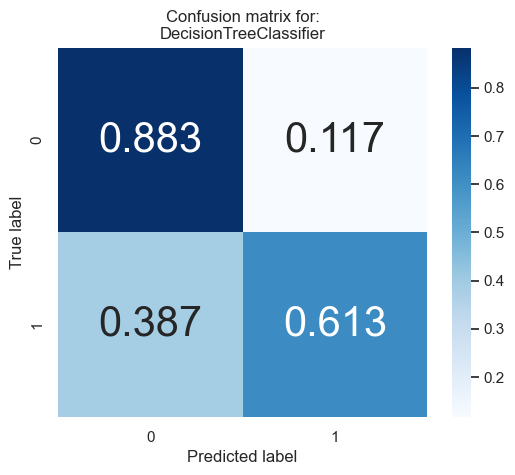

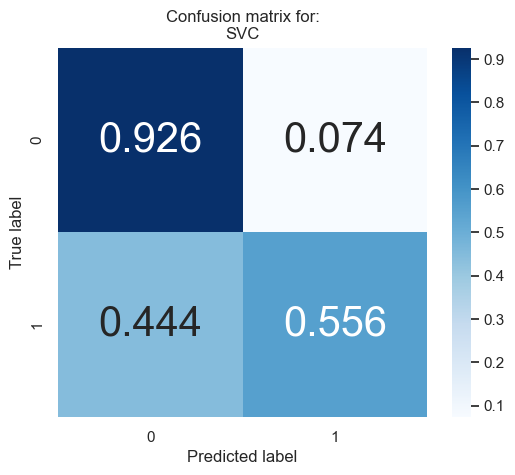

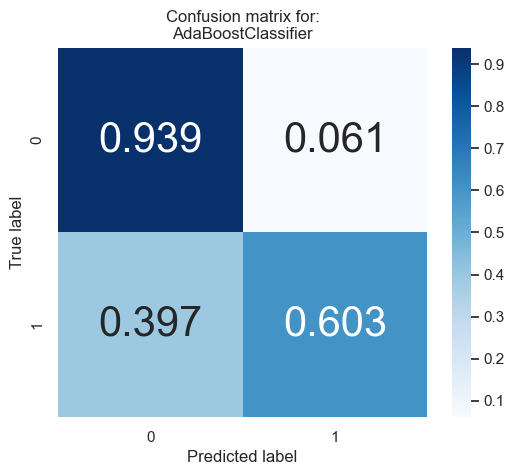

In [25]:
#Visualizing the confusion matrix for each classifier
from sklearn.metrics import confusion_matrix

for i,model in enumerate([clf_A,clf_B,clf_C]):
    cm = confusion_matrix(y_test, model.predict(X_test))
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize the data

    # view with a heatmap
    plt.figure(i)
    sns.heatmap(cm, annot=True, annot_kws={"size":30}, 
            cmap='Blues', square=True, fmt='.3f')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Confusion matrix for:\n{}'.format(model.__class__.__name__));
    
    #save confusion matrixs
    plt.savefig('visuals/confusion_matrix_{}.png'.format(model.__class__.__name__))

<h5 id="7">Model Tuning<h/5>

In [26]:
# Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# Initialize the classifier
clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

# Create the parameters list you wish to tune
parameters = {
    'n_estimators':[50, 120],
    'learning_rate':[0.1, 0.5, 1.],
    'base_estimator__min_samples_split' : np.arange(2, 8, 2),
    'base_estimator__max_depth' : np.arange(1, 4, 1)
}

# Make an fbeta_score scoring object
scorer = make_scorer(fbeta_score,beta=0.5)

# Perform grid search on the classifier using 'scorer' as the scoring method
grid_obj = GridSearchCV(estimator=clf, param_grid=parameters,scoring=scorer)

# Fit the grid search object to the training data and find the optimal parameters
grid_fit = grid_obj.fit(X_train,y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print(best_clf)
#Time to run this cell 22 minutes

Unoptimized model
------
Accuracy score on testing data: 0.8385
F-score on testing data: 0.6713

Optimized Model
------
Final accuracy score on the testing data: 0.8691
Final F-score on the testing data: 0.7496
AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.5, n_estimators=120)



<h5 id="8"> Feature Importance<h/5>

<h6>Extracting Feature Importance<h/6>

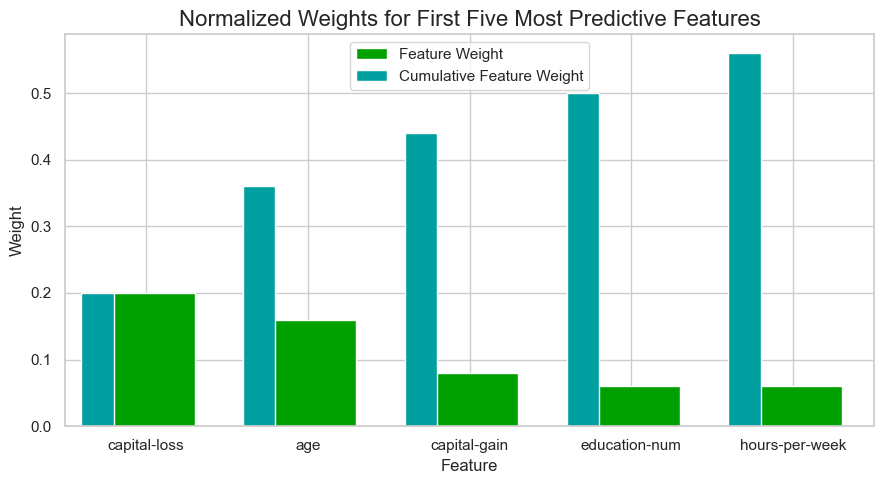

<Figure size 640x480 with 0 Axes>

In [27]:
# Import a supervised learning model that has 'feature_importances_'

# Train the supervised model on the training set 
model = AdaBoostClassifier().fit(X_train,y_train)

# Extract the feature importances
importances = model.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)
plt.savefig('visuals/feature_importances.png')

<h5 id="9">9-)Feature Selection<h/5>

In [9]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5))) 

NameError: name 'X_train' is not defined

In [ ]:
#Başak's addition:
#choropleth map

#data native country mapping to codes
import pycountry
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

df = pd.read_csv('census.csv')
df['native-country'].value_counts()


mapping = {'Outlying-US(Guam-USVI-etc)': 'Others'}
#United-States to United States
df['native-country'] = df['native-country'].apply(lambda x: x.replace('-', ' '))
df['native-country'] = df['native-country'].apply(lambda x: mapping[x] if x in mapping else x)
#counmts
df['native-country'].value_counts()
#countries to codes
for i in df['native-country'].unique():
    try:
        print(i, pycountry.countries.search_fuzzy(i)[0].alpha_3)
    except:
        print(i, 'not found')

#mapping
mapping = {' United States': 'USA', ' Cuba': 'CUB', ' Jamaica': 'JAM', ' India': 'IND', ' Mexico': 'MEX', ' South': 'ZAF', ' Puerto Rico': 'PRI', ' Honduras': 'HND', ' England': 'GBR', ' Canada': 'CAN', ' Germany': 'DEU', ' Iran': 'IRN', ' Philippines': 'PHL', ' Italy': 'ITA', ' Poland': 'POL', ' Columbia': 'COL', ' Cambodia': 'KHM', ' Thailand': 'THA', ' Ecuador': 'ECU', ' Laos': 'LAO', ' Taiwan': 'TWN', ' Haiti': 'HTI', ' Portugal': 'PRT', ' Dominican Republic': 'DOM', ' El Salvador': 'SLV', ' France': 'FRA', ' Guatemala': 'GTM', ' China': 'CHN', ' Japan': 'JPN', ' Yugoslavia': 'YUG', ' Peru': 'PER', ' Outlying-US(Guam-USVI-etc)': 'not found', ' Scotland': 'GBR', ' Trinadad&Tobago': 'TTO', ' Greece': 'GRC', ' Nicaragua': 'NIC', ' Vietnam': 'VNM', ' Hong': 'HKG', ' Ireland': 'IRL', ' Hungary': 'HUN', ' Holand-Netherlands': 'not found'}

#create a new column with mapping of native country
df['native-country-code'] = df['native-country'].apply(lambda x: mapping[x] if x in mapping else 'not found')

#value counts
df['native-country-code'].value_counts()


    

 United States USA
 Cuba CUB
 Jamaica JAM
 India IND
 Mexico MEX
 Puerto Rico PRI
 Honduras HND
 England not found
 Canada CAN
 Germany DEU
 Iran IRN
 Philippines PHL
 Poland POL
 Columbia CAN
 Cambodia KHM
 Thailand THA
 Ecuador ECU
 Laos not found
 Taiwan TWN
 Haiti HTI
 Portugal PRT
 Dominican Republic DOM
 El Salvador SLV
 France FRA
 Guatemala GTM
 Italy ITA
 China CHN
 South CMR
 Japan JPN
 Yugoslavia not found
 Peru PER
 Outlying US(Guam USVI etc) not found
 Scotland not found
 Trinadad&Tobago not found
 Greece GRC
 Nicaragua NIC
 Vietnam VNM
 Hong HKG
 Ireland IRL
 Hungary HUN
 Holand Netherlands not found


USA          41292
MEX            903
PHL            283
DEU            193
PRI            175
CAN            163
SLV            147
IND            147
GBR            139
CUB            133
CHN            113
JAM            103
ZAF            101
ITA            100
DOM             97
JPN             89
GTM             86
VNM             83
COL             82
POL             81
HTI             69
PRT             62
IRN             56
TWN             55
GRC             49
NIC             48
PER             45
ECU             43
FRA             36
IRL             36
THA             29
HKG             28
KHM             26
TTO             26
YUG             23
not found       23
LAO             21
HND             19
HUN             18
Name: native-country-code, dtype: int64

In [12]:
import matplotlib.pyplot as plt

#choropleth map - income by native country (heatmap) counts
greater50_df = df[df['income'] == '>50K']
greater50_df['native-country-code'].value_counts()
less50_df = df[df['income'] == '<=50K']
less50_df['native-country-code'].value_counts()



chrolo_df = pd.DataFrame({'native-country-code': df['native-country-code'].unique(), 'greater50': greater50_df['native-country-code'].value_counts(), 'less50': less50_df['native-country-code'].value_counts()})

chrolo_df['total'] = chrolo_df['greater50'] + chrolo_df['less50']
chrolo_df['greater50%'] = chrolo_df['greater50'] / chrolo_df['total']
chrolo_df['less50%'] = chrolo_df['less50'] / chrolo_df['total']

chrolo_df = chrolo_df.fillna(0)

fig = px.choropleth(chrolo_df, locations="native-country-code",
                    color="greater50%", 
                    hover_name="native-country-code", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

#save the map
fig.write_html("visuals/choropleth.html")



<h5 id="10"> 10-)References: <h/5>

* <sup>1</sup> https://cseweb.ucsd.edu/classes/sp15/cse190-c/reports/sp15/048.pdf
* <sup>2</sup> https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4120293/#:~:text=The%20log%20transformation%20is%2C%20arguably,normal%20or%20near%20normal%20distribution.
* <sup>3</sup> https://machinelearningmastery.com/how-to-develop-and-evaluate-naive-classifier-strategies-using-probability/#:~:text=A%20naive%20classifier%20model%20is,order%20to%20make%20a%20prediction.